### Проектная работа по теме: Принятие решений в бизнесе.

#### О проекте:

##### Часть 1. Приоритизация гипотез.
9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 
Задача:

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приориета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приортета.
Укажите, как изменилась приоритезация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

##### Часть 2. A/B Анализ.

Результаты теста описаны в файлах /datasets/orders.csv и /datasets/visitors.cтирование, проанализировать полученные 
Проанализируйте A/B-тест:
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения
5.	Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста 
  
Описание данных: файл hypothesis.csv, visitors.csv, orders.csv

Данные для первой части

Файл hypothesis.csv
Hypothesis — краткое описание гипотезы;\
Reach — охват пользователей по 10-балльной шкале;\
Impact — влияние на пользователей по 10-балльной шкале;\
Confidence — уверенность в гипотезе по 10-балльной шкале;\
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл /datasets/orders.csv
transactionId — идентификатор заказа;\
visitorId — идентификатор пользователя, совершившего заказ;\
date — дата, когда был совершён заказ;\
revenue — выручка заказа;\
group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
date — дата;\
group — группа A/B-теста;\
visitors — количество пользователей в указанную дату в указанной группе A/B-тестаA/B-теста группе A/B-тестаypothesis.csv,\
visitors.csv, orders.csv

### Загрузка данных и подготовка их к анализу

**Пути к файлам:**
- гипотезы: /datasets/hypothesis.csv
- заказы: /datasets/orders.csv
- визиты: /datasets/visits.csv;

In [4]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
pd.set_option('display.max_colwidth', 0)

In [5]:
#Импортирую данные и вывожу информацию о данных:

try:
    hypothesis = pd.read_csv("C:\\Users\Ahsas\\Desktop\\task7\\hypothesis.csv")
    visitors = pd.read_csv("C:\\Users\Ahsas\\Desktop\\task7\\visitors.csv")
    orders = pd.read_csv("C:\\Users\Ahsas\\Desktop\\task7\\orders.csv")
    
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')  

In [6]:
# Гипотезы:
hypothesis.info()
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [7]:
# Посетители магазина:
visitors.info()

print()
print('Общее число посещений:', visitors['visitors'].sum())
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Общее число посещений: 37652


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# Заказы:
orders.info()
print()
print('Общее число уникальных покупателей:', orders['visitorId'].nunique())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Общее число уникальных покупателей: 1031


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Предобработка данных:

Дубли и пустые ячейки:


In [9]:
# Проверка на наличие дублей:
print('Пустые ячейки - visitors:', visitors.duplicated().sum())
print('Пустые ячейки - orders:',orders.duplicated().sum())
print('Пустые ячейки - hypothesis:',hypothesis.duplicated().sum())
print('Дубли - visitors:', visitors.duplicated().sum())
print('Дубли - orders:', orders.duplicated().sum())
print('Дубли - hypothesis:', hypothesis.duplicated().sum())

Пустые ячейки - visitors: 0
Пустые ячейки - orders: 0
Пустые ячейки - hypothesis: 0
Дубли - visitors: 0
Дубли - orders: 0
Дубли - hypothesis: 0


In [10]:
# приведу названия колонок файла к нижнему регистру:
hypothesis.columns=hypothesis.columns.str.lower() 
hypothesis.head(1)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


In [11]:
# Проверка соответствия периодов для анализа в исходных файлах orders и visitors:
min_visitors_date= visitors['date'].min()
max_visitors_date= visitors['date'].max()

min_orders_date= orders['date'].min()
max_orders_date= orders['date'].max()


print('visitors min date:', min_visitors_date)
print('visitors max date:', max_visitors_date)
print()
print('orders min date:', min_orders_date)
print('orders max date:', max_orders_date)

visitors min date: 2019-08-01
visitors max date: 2019-08-31

orders min date: 2019-08-01
orders max date: 2019-08-31


Вывод: выгруженны данные файлов orders и visitors за одинаковый период с 1 по 31 августа 2019 г.

In [12]:
# Проверю, не допущено ли накладок - пользователи находятся только в группе А или B.
visitorsA= orders.loc[orders['group']=='A']
visitorsB= orders.loc[orders['group']=='B']
visitorsBinA=visitorsA.query('visitorId in @visitorsB.index')
visitorsAinB=visitorsB.query('visitorId in @visitorsA.index')
print(len(visitorsBinA))
print(len(visitorsAinB))

0
0


Вывод: взаимная сверка между группами на присутствие в более чем 1ой группе пользователей по id не выявила подобных случаев.

In [13]:
# Проверю соразмерность групп А и B:
unique_users=orders.pivot_table(index='group',values=['visitorId'], aggfunc='nunique')
unique_users.columns=['number_unique_users']

print(unique_users)
div_groups=(visitorsB['visitorId'].count()-visitorsA['visitorId'].count())/visitorsA['visitorId'].count()
print(f'Группа B больше группы на: {div_groups :.0%}') 


       number_unique_users
group                     
A      503                
B      586                
Группа B больше группы на: 15%


#### Вывод по итогу предобработки данных: 
- Пустых ячеек и дублей в исходных файлах не выявлено. Dummy (не значимых) значений в полях с параметрами не выявлено;
- Данные исходных файлов visitors и orders предоставлены за одинаковый интервал времени с 1 авг. по 31 авг. 2019 года;
- заголовки файла hypothesis приведены к нижнему регистру для единообразия.
- Пересечений на уровня пользователя между группами нет. Попавший в одну из групп посетитель остаётся в этой группе до конца теста.
- Количество уникальных пользователей в различных группах различается на 15%, что некорректно для теста.

### Часть 1. Приоритизация гипотез.
9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

Задача:

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритезация гипотез при применении RICE вместо ICE.
Объясните, почему так произошло.

In [14]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Применю фреймворк ICE для приоритизации гипотез. Отсортирую их по убыванию приоритета.

In [15]:
hypothesis['ICE']=round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],2)
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [16]:
hypothesis['RICE']=round(hypothesis['impact']*hypothesis['confidence']*hypothesis['reach']/hypothesis['efforts'],2)
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод: 
- Наиболее перспективными по методике ранжирования ICE оказались гипотезы 8, 0, 7, набравшие рейтинг выше 10.
- По RICE наиболее перспективными выглядят гипотезы 7, 2, 0.
- при RICE выше в рейтиге оказалась гипотеза 2, где показать reach - охват пользователей, которых затронет изменение = 8,
  тогда как для гипотезы 8, попавшей по ICE в первую тройку, reach =1, что повлияло на позицию в RICE фреймворке -снижение на пятую строчку рейтинга.


### Анализ A/B теста. 

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Подготовлю данные и построю графики, согласно заданию.

In [19]:
# Соберу агрегированные кумулятивные данные по дням о заказах в несколько действий.
orders['date'] = pd.to_datetime(orders['date'],format='%Y-%m-%d')
visitors['date'] =pd.to_datetime(visitors['date'],format='%Y-%m-%d')

#Создам массив уникальных пар значений дат и групп теста методом drop_duplicates на основе orders: 
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

print('Кумулятивная выручка группы B:',cumulativeRevenueB.head())
print()
print('Кумулятивная выручка группы A:',cumulativeRevenueA.head())
print()
print('кумулятивные данные в одной таблице:',cumulativeData.head())

Кумулятивная выручка группы B:         date  revenue  orders
1 2019-08-01  101217   21    
3 2019-08-02  266748   45    
5 2019-08-03  380996   61    
7 2019-08-04  489567   78    
9 2019-08-05  581995   101   

Кумулятивная выручка группы A:         date  revenue  orders
0 2019-08-01  148579   24    
2 2019-08-02  242401   44    
4 2019-08-03  354874   68    
6 2019-08-04  425699   84    
8 2019-08-05  549917   109   

кумулятивные данные в одной таблице:         date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


##### График кумулятивной выручки по группам

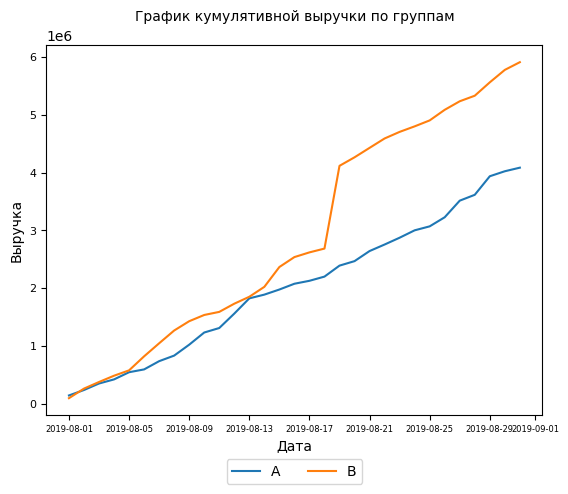

In [20]:
# Построю график выручки группы A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='А')

# Построю график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам\n', fontsize=10)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(size=6)
plt.yticks(size=8)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.1), ncol=5);

Вывод:

Согласно графика кумулятивной выручки по группам, выручка почти равномерно увеличивается в течение всего теста. 
В середине мясяца у группы B есть сильный всплеск, что может сигнализировать о колебаниях числа заказов, либо о появлении очень дорогих заказов в выборке. Необходимо проанализировать выбросы.


##### График кумулятивного среднего чека по группам.

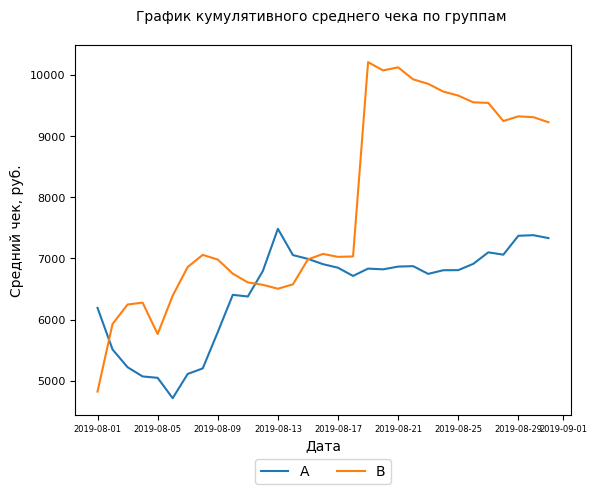

In [21]:

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам \n', fontsize=10)
plt.ylabel('Средний чек, руб.')
plt.xlabel('Дата')
plt.xticks(size=6)
plt.yticks(size=8)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.1), ncol=5);


Вывод: 
•	Средний чек тоже становится более равномерным в третьей декаде месяца: для группы A и продолжает медленно расти для группы B - падать. Возможно, резкий всплеск около 20 авг. вызван аномалиями в данных - заказы на крупные суммы. Вероятно, нужно устранить аномалии или использовать больше данных. 

##### График относительного изменения кумулятивного среднего чека группы B к группе A.

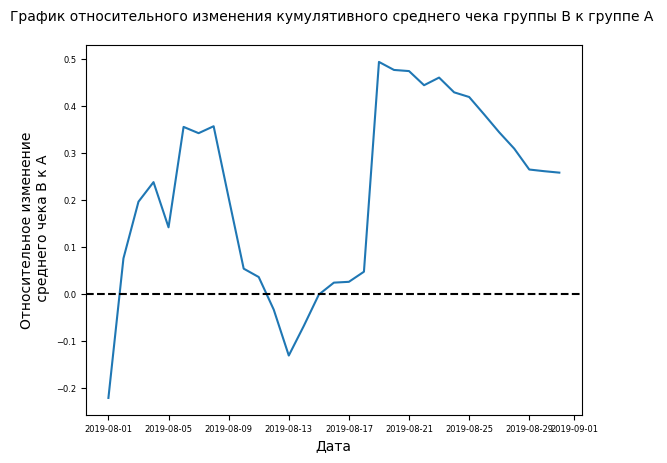

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A \n', fontsize=10)
plt.ylabel('Относительное изменение\n среднего чека В к А')
plt.xlabel('Дата')
plt.xticks(size=6)
plt.yticks(size=6)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Вывод:
График относительного различия для среднего чека групп А и В нескольких точках резко «скачет», что также указывает на присутствие выбросов. Тем не менее, график показывает относительный рост среднего чека группы В.

##### График кумулятивного среднего количества заказов на посетителя по группам.

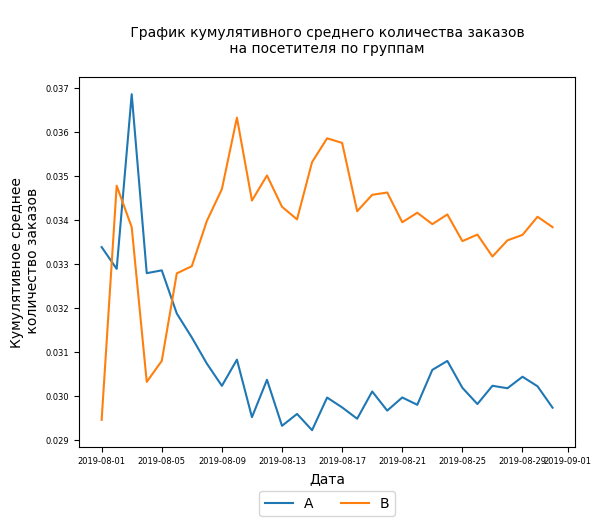

In [23]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('\n График кумулятивного среднего количества заказов \n на посетителя по группам \n', fontsize=10)
plt.xticks(size=6)
plt.yticks(size=6)in
plt.ylabel('Кумулятивное среднее\n количество заказов')
plt.xlabel('Дата')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.1), ncol=5);




Вывод:
графики конверсии в группах значительно колебались в первую неделю периода, но со второй недели конверсия групп установилась на определенном интервале, причем группа B показала лучший результат до конца месяца. 


##### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833


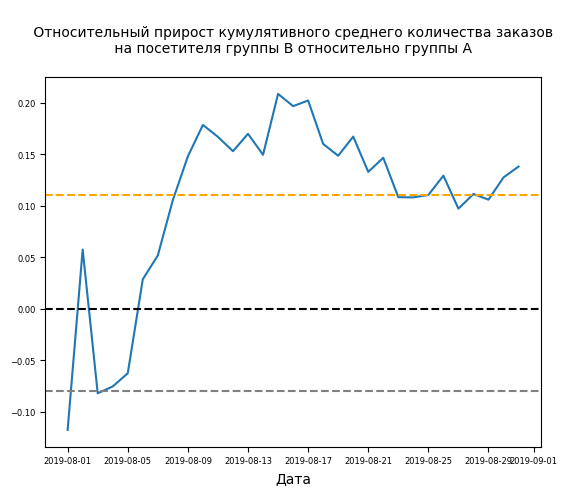

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(size=6)
plt.yticks(size=6)
plt.xlabel('Дата')


plt.title('\n Относительный прирост кумулятивного среднего количества заказов \n на посетителя группы B относительно группы A \n', fontsize=10);

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.08, color='grey', linestyle='--');
plt.axhline(y=0.11, color='orange', linestyle='--');
mergedCumulativeConversions.head(3)

Вывод:

В начале теста группа B значительно проигрывала группе A, затем на 2й неделе вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось, но теперь постепенно растёт.
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.Необходимо проанализировать аномалии, для подтверждения..

##### Точечный график количества заказов по пользователям.

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     


count    1031.000000
mean     1.161009   
std      0.724919   
min      1.000000   
25%      1.000000   
50%      1.000000   
75%      1.000000   
max      11.000000  
Name: orders, dtype: float64

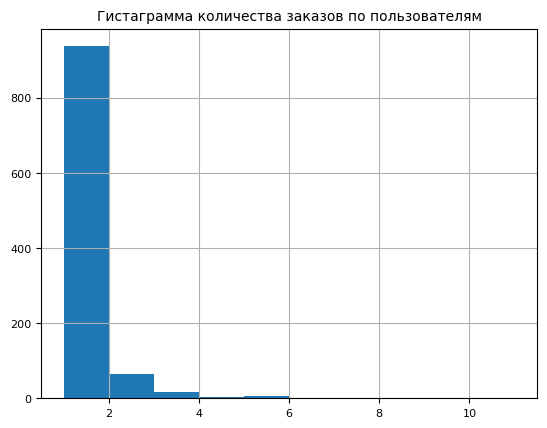

In [25]:
# Подсчитаем количество заказов по пользователям:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(5)) 
ordersByUsers['orders'].hist(bins=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Гистаграмма количества заказов по пользователям', fontsize=10);
ordersByUsers['orders'].describe()

Гистограмма показывает, что большиинство пользоваелей делают не более 4х заказов.

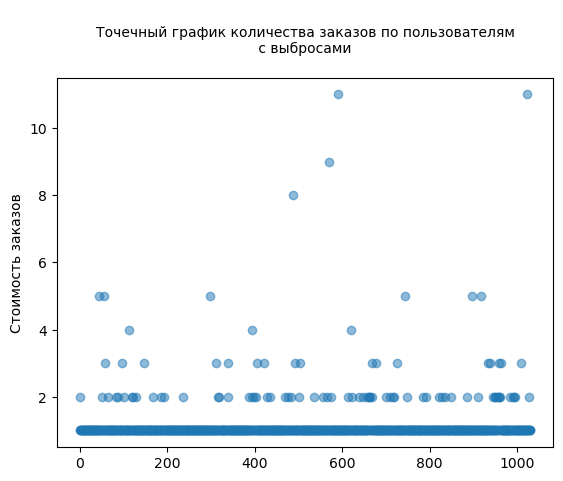

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'],alpha=0.5)
plt.ylabel('Стоимость заказов', fontsize=10)
plt.title('\nТочечный график количества заказов по пользователям\n с выбросами \n', fontsize=10);

На точечном графике количества заказов по пользователям много пользователей с 2-4 заказами. Их точная доля не ясна.

#####  Посчитаю 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [27]:
print('Вывод: 95-й и 99-й перцентили количества заказов на пользователя', np.percentile(ordersByUsers['orders'], [95, 99])) 

Вывод: 95-й и 99-й перцентили количества заказов на пользователя [2. 4.]


##### Построю точечный график стоимостей заказов.

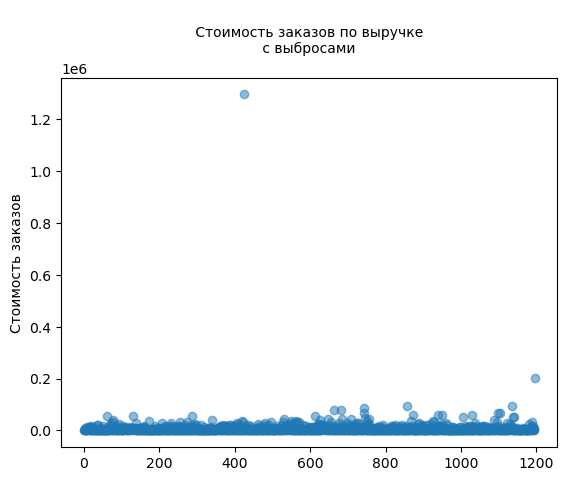

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5);
plt.ylabel('Стоимость заказов', fontsize=10)
plt.title('\n Стоимость заказов по выручке \n с выбросами \n', fontsize=10);

##### Посчитаю 95-й и 99-й перцентили стоимости заказов. Определю границу для определения аномальных заказов.

In [29]:
print('Вывод: 95 и 99 перцентили среднего чека в выборке', np.percentile(orders['revenue'], [95, 99])) 

Вывод: 95 и 99 перцентили среднего чека в выборке [28000.  58233.2]


Исходя из результатов выше видно, что в данных, скорее всего, есть выбросы;
Гграницу дляудаления выбросов можно установить на уровне 95%, так уровень среднего чека установим - 28000 (95%), а число заказов - 4 (99%).

Посчитаю статистическую значимость различий в среднем числе заказов на посетителя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулирюм гипотезы.
-  Нулевая: различий в среднем количестве заказов между группами нет
-  Альтернативная: различия в среднем между группами есть..

##### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head(5)) 
print()
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value для сравнения среднего между группами',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('относительное различие в среднем между группами',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

Вывод:

По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 
Относительное различие в среднем количестве заказов между группами равно 13.8%.

##### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 


In [31]:
# Для расчета статистической значимости различий в среднем чеке, 
# передам критерию mannwhitneyu() данные о выручке с заказов. 
print('P-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительное различие в среднем чеке: 0.259


Вывод:

P-value значительно больше 0.05 - 0,729. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Относительное различие в среднем чеке между группами равно 25.9%, т.е. средний чек группы B значительно выше, чем у группы А.

#### Анализ по "очищенным" данным:
Найденные выше 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Приму за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 28 000 рублей. Таким образом уберу 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 

In [32]:
# Сделаю срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, 
# совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5));
print('Число аномальных пользователей:',abnormalUsers.shape[0]);

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
Число аномальных пользователей: 59


##### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.


In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
# Применю статистический критерий Манна-Уитни к полученным выборкам:
print('p-value - данные без аномальных заказов: ''{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие в среднем между группами: ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value - данные без аномальных заказов: 0.018
относительное различие в среднем между группами: 0.145


Вывод: 

Влияние аномальных заказов на результаты незначительно. 
Как и в случае с "не очищенными" данными, между группами есть статистически значимая разница. 
Число — p-value = 0.018 (было 0.01679) меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 
Относительное различие в среднем количестве заказов между группами равно 14.5% (было 13.8%)

##### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 


In [34]:
print('p-value - данные без аномальных заказов - ср.чек:'
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительное различие:'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value - данные без аномальных заказов - ср.чек:0.961
относительное различие:-0.014


Вывод:
Не получилось отвергнуть нулевую гипотезу. P-value увеличился до 96% по сравнению с 73% данных с аномалиями. Значит, причин считать, что в среднем чеке есть различия, нет. Относительный прирост группы В к группе А сократилася с почти 26% до -1.4%.
c 6%

### Итоговые выводы:

Часть 1. Приоритизация гипотез.

Анализ 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
-	Наиболее перспективными по методике ранжирования ICE оказались гипотезы 8, 0, 7, набравшие рейтинг выше
-	По RICE наиболее перспективными выглядят гипотезы 7, , RICE выше в рейтинге оказалась гипотеза 2, где показатель reach - охват пользователей, которых затронет изменение = 8, тогда как для гипотезы 8, попавшей по ICE в первую тройку, reach =1, что повлияло на позицию в RICE фреймворке -снижение на пятую строчку рейтинга.

Часть 2. 
Анализ A/B теста.

Вывод по итогу предобработки - данных:
- Пустых ячеек и дублей в исходных файлах не выявлено. 
- Dummy (не значимых) значений в полях с параметрами не выявлено; 
- Данные исходных файлов visitors и orders предоставлены за одинаковый интервал времени с 1 авг. по 31 авг.- 2019 года; 
- заголовки файла hypothesis приведены к нижнему регистру для единообразия. 
- Пересечений на уровне пользователя между группами нет. Попавший в одну из групп посетитель остаётся в этой группе до- конца теста. Количество уникальных пользователей в различных группах различается на 15%, что некорректно для теста.

Проведена предварительная подготовка данных для построения графиков для оценки.

Результаты тестов на данных с аномалиями:

- Согласно графика кумулятивной выручки по группам, выручка почти равномерно увеличивается в течение всего теста. В середине месяца у группы B есть сильный всплеск, что может сигнализировать о колебаниях числа заказов, либо о появлении очень дорог х заказов в выборке. Необходимо проанализировать выбросы.

- Средний чек тоже становится более равномерным в третьей декаде месяца: для группы A и продолжает медленно расти для группы B-падать. Возможно, резкий всплеск около 20 авг. вызван аномалиями в данных - заказы на крупные суммы. Вероятно, нужно устранить аномалии или использовать больше данных.

- График относительного различия для среднего чека групп А и В нескольких точках резко «скачет», что также указывает на присутствие выбросов. Тем не менее, график показывает относительный рос Г среднего ека группы В.

- графики конверсии в группах значительно колебались в первую неделю периода, но со второй недели конверсия групп установилась на определенном интервале, причем группа B показала лучший результат о конца месяца.

- В начале теста группа B значительно проигрывала группе A, затем на 2й неделе вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось, но теперь постепенно растёт. В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Необходимо проанализировать аномалии для подтверждения.

Анализ данных на выбросы:
- На точечном графике количества заказов по пользователям много пользователей с 2-4 заказами. Их точная доля не ясна.
- 95-й и 99-й перцентили количества заказов на пользователя - 2 и 4 заказа, соответственно.
- 95-й и 99-й перцентили среднего чека в выборке - 28 000 руб. и 58233.2 руб., соответственно.

Исходя из результатов выше видно, что в данных, скорее всего, есть выбросы; Границу для удаления выбросов можно установить на уровне 95%, так уровень среднего чека установим - 28000 (95%), а 
число заказов - 4 (99%).

Посчитаю статистическую значимость различий в среднем числе заказов на посетителя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. 

Сформулирую гипотезы.
- Нулевая: различий в среднем  между группами нет.
- Альтернативная: различия в среднем между группами есть.

Оценка статистической значимости показателей:

По «сырым» данным:
- есть различия в среднем числе заказов групп A и B. Число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительное различие в среднем количестве заказов между группами равно 13.8%.
- P-value значительно больше 0.05 - 0,729. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие B значительно выше, чем у группы А. т.е. средний чек группы B значительно выше, чем у группы А.

По «очищенным» данным: 
- Оценка статистической значимости различий в среднем количестве заказов посетителя между группами по «очищенным» данным показала, что влияние аномальных заказов на результаты незначительно. Как и в случае с "не очищенным данными, между группами есть статистически значимая разница. Число — p-value = 0.018 (было 0.01679) меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительное различие в среднем количестве заказов между группами равно 14.5% (было 13.8%).

- По результатам оценки статистической значимости различий в среднем чеке заказа между группами не получилось отвергнуть нулевую гипотезу. P-value увеличился до 96% по сравнению с 73% данных с аномалиями. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительный прирост группы В к группе А сократился с почти 26% до -1.4%.

#### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

На основании вышесказанного, считаю, что нужно зафиксировать победу группы B и остановить тест:
- выявлена статистически значима разница в среднем количестве заказов. Относительное преимущество группы на "очищенных" данных - 14.5% (то же показал анализ "сырых" данных).
- группа В выигрывает по показателю относительного различия среднего чека в сырых данных, но уступает 1.4% после удаления выбросов. Тем не менее, P-value "очищеннных" данных увеличился до 96% по сравнению с 73% данных с аномалиями. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
- графики изменения кумулятивной выручки, среднего чека и количества заказов говорят о преимуществе группы В.